# Alissa Beaderstadt: Customer Purchases Analysis

Author: Alissa Beaderstadt

Purpose: In this analysis, we aim to understand how much each customer spends on individual products. This will help identify customer preferences, product performance, and opportunities for tailored marketing or promotions. 

Date: 04-14-2025

# Introduction

Objective: Analyze customer spending behavior across different products to identify purchasing patterns and inform marketing strategies.


# Imports:
   Below are the necessary imports for this notebook:

In [178]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Connect to the database:

In [179]:
# Connect to the smart_sales database
conn = sqlite3.connect(r"C:\Projects\smart-store-beaderstadt\data\dw\smart_sales.db")


cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in smart_sales.db:", tables)


Tables in smart_sales.db: [('customers',), ('products',), ('sales',)]


# Load Data

### Load and Inspect Customers Data

In [180]:
# Load Customers Data
customers_df = pd.read_sql_query("SELECT * FROM customers", conn)
print("Customers Data (First 5 Rows):")
print(customers_df.head())
print("\nCustomers Data Summary Statistics:")
print(customers_df.describe())

Customers Data (First 5 Rows):
   customer_id           name region   join_date  loyalty_points  \
0         1001  William White   East  11/11/2021            1256   
1         1002   Wylie Coyote   East   2/14/2023             105   
2         1003      Dan Brown   West  10/19/2023             876   
3         1004      Chewbacca   West   11/9/2022              95   
4         1005         Dr Who  North   8/18/2023             333   

  preferred_contact_method standard_date_time  
0                     Text         2021-11-11  
1                     Call         2023-02-14  
2                    Email         2023-10-19  
3                     Text         2022-11-09  
4                     None         2023-08-18  

Customers Data Summary Statistics:
       customer_id  loyalty_points
count    11.000000       11.000000
mean   1006.000000     1036.000000
std       3.316625     1170.179046
min    1001.000000       95.000000
25%    1003.500000      241.500000
50%    1006.000000      79

### Load and Inspect Products Data

In [181]:
# Load Products Data
products_df = pd.read_sql_query("SELECT * FROM products", conn)
print("\nProducts Data (First 5 Rows):")
print(products_df.head())
print("\nProducts Data Summary Statistics:")
print(products_df.describe())


Products Data (First 5 Rows):
   product_id product_name     category  unit_price  year_added supplier
0         101       laptop  Electronics      793.12        2012    Apple
1         102       hoodie     Clothing       39.10        2018     Nike
2         103        cable  Electronics       22.76        2023     Dell
3         104          hat     Clothing       43.10        2000   Adidas
4         105     football       Sports       19.78        2010   Wilson

Products Data Summary Statistics:
       product_id  unit_price   year_added
count     8.00000    8.000000     8.000000
mean    104.50000  135.802500  2013.625000
std       2.44949  266.823468     7.998884
min     101.00000   12.560000  2000.000000
25%     102.75000   22.015000  2009.500000
50%     104.50000   41.100000  2013.000000
75%     106.25000   72.510000  2019.250000
max     108.00000  793.120000  2024.000000


### Load and Inspect Sales Data

In [182]:
# Load Sales Data
sales_df = pd.read_sql_query("SELECT * FROM sales", conn)
print("\nSales Data (First 5 Rows):")
print(sales_df.head())
print("\nSales Data Summary Statistics:")
print(sales_df.describe())

# Close the connection
conn.close()


Sales Data (First 5 Rows):
   sale_id  customer_id  product_id  store_id  campaign_id  sale_amount  \
0      550         1008         102       404            0        39.10   
1      551         1009         105       403            0        19.78   
2      552         1004         107       404            0       335.10   
3      553         1006         102       406            0       195.50   
4      554         1005         102       405            0       117.30   

    sale_date  discount_percent     state  
0  2024-01-06              0.25    Kansas  
1  2024-01-06              0.15  Missouri  
2  2024-01-16              0.50      Iowa  
3  2024-01-16              0.09  Nebraska  
4  2024-01-25              0.20      Ohio  

Sales Data Summary Statistics:
          sale_id  customer_id  product_id    store_id  campaign_id  \
count   94.000000    94.000000   94.000000   94.000000    94.000000   
mean   596.500000  1005.723404  104.393617  403.319149     0.425532   
std     27.2

# Merge Dataframes

In [183]:

# Merge the sales and customers DataFrame on 'customer_id'
sales_customers_df = pd.merge(sales_df, customers_df, on='customer_id', how='inner')

# Merge the above result with products data on 'product_id'
final_df = pd.merge(sales_customers_df, products_df, on='product_id', how='inner')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame (First 5 Rows):")
print(final_df.head())

# Get a summary of the merged data
print("\nMerged DataFrame Summary Statistics:")
print(final_df.describe())

Merged DataFrame (First 5 Rows):
   sale_id  customer_id  product_id  store_id  campaign_id  sale_amount  \
0      550         1008         102       404            0        39.10   
1      551         1009         105       403            0        19.78   
2      552         1004         107       404            0       335.10   
3      553         1006         102       406            0       195.50   
4      554         1005         102       405            0       117.30   

    sale_date  discount_percent     state           name region  join_date  \
0  2024-01-06              0.25    Kansas     Tony Stark  North   5/1/2020   
1  2024-01-06              0.15  Missouri   Jason Bourne   West  12/1/2020   
2  2024-01-16              0.50      Iowa      Chewbacca   West  11/9/2022   
3  2024-01-16              0.09  Nebraska  Tiffany James  South   6/7/2021   
4  2024-01-25              0.20      Ohio         Dr Who  North  8/18/2023   

   loyalty_points preferred_contact_method stan

# Analysis: Analyzing Laptop Purchases
(Slicing) We focus on the 'laptop' product to understand customer spending behavior specific to this item.

In [184]:
# Slice: Look at spending on the 'laptop' product
sliced_df = final_df[final_df['product_name'] == 'laptop']

# Group to see total spend by customer on laptops
sliced_summary = sliced_df.groupby('customer_id')['sale_amount'].sum().reset_index()

# Display
print("Customer Spend on Laptops:")
print(sliced_summary)


Customer Spend on Laptops:
   customer_id  sale_amount
0         1001     22207.36
1         1002      5551.84
2         1003      1586.24
3         1004     11103.68
4         1006      9517.44
5         1007      9517.44
6         1009       793.12
7         1010     21414.24
8         1011      7138.08


# Visualization: Total Spend Per Customer on Laptops

C:\Users\Alissa\AppData\Local\Temp\ipykernel_9732\660119758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sliced_summary, x='customer_id', y='sale_amount', palette='Blues_r')


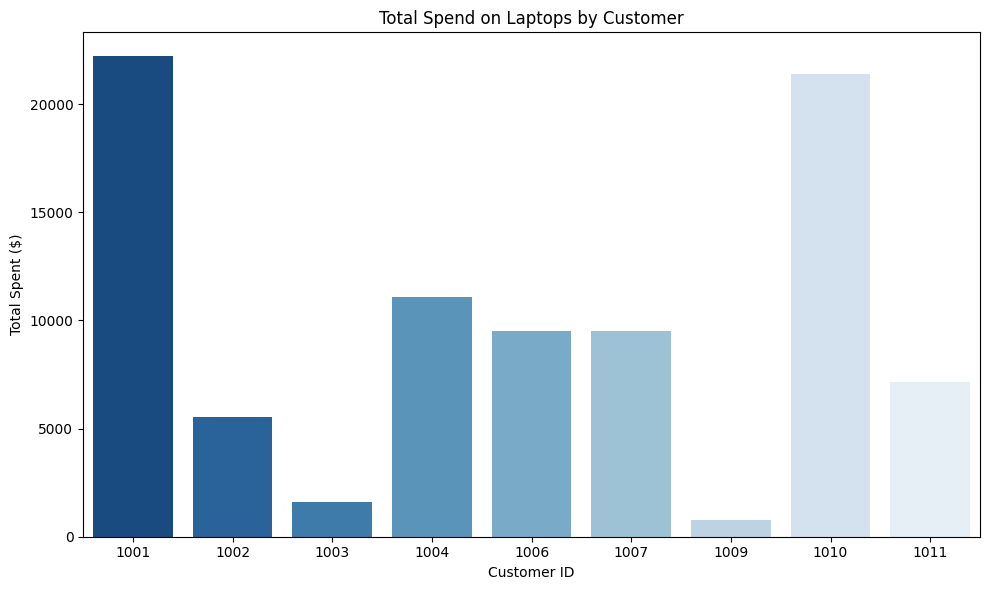

In [185]:
# Filter for laptops only
sliced_df = final_df[final_df['product_name'] == 'laptop']

# Group to get total spend per customer on laptops
sliced_summary = sliced_df.groupby('customer_id')['sale_amount'].sum().reset_index()

# Visualization: Total spend on laptops by customer
plt.figure(figsize=(10, 6))
sns.barplot(data=sliced_summary, x='customer_id', y='sale_amount', palette='Blues_r')
plt.title("Total Spend on Laptops by Customer")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()

Observations: summarize key statistics to understand the data better.

# Analysis: Total Spend per Customer per Product
(Dicing) This table shows how much each customer has spent on each product.

In [186]:
# Query to calculate total spend per customer for each product
customer_spend_df = final_df.groupby(['customer_id', 'product_id'])['sale_amount'].sum().reset_index()

# Display the results
print("Total Spend by Customer on Each Product:")
print(customer_spend_df.head())


Total Spend by Customer on Each Product:
   customer_id  product_id  sale_amount
0         1001         101     22207.36
1         1001         104       560.30
2         1001         105        39.56
3         1001         106       622.86
4         1001         107       134.04


# Visualization: Total Spent by Each Customer on Each Product

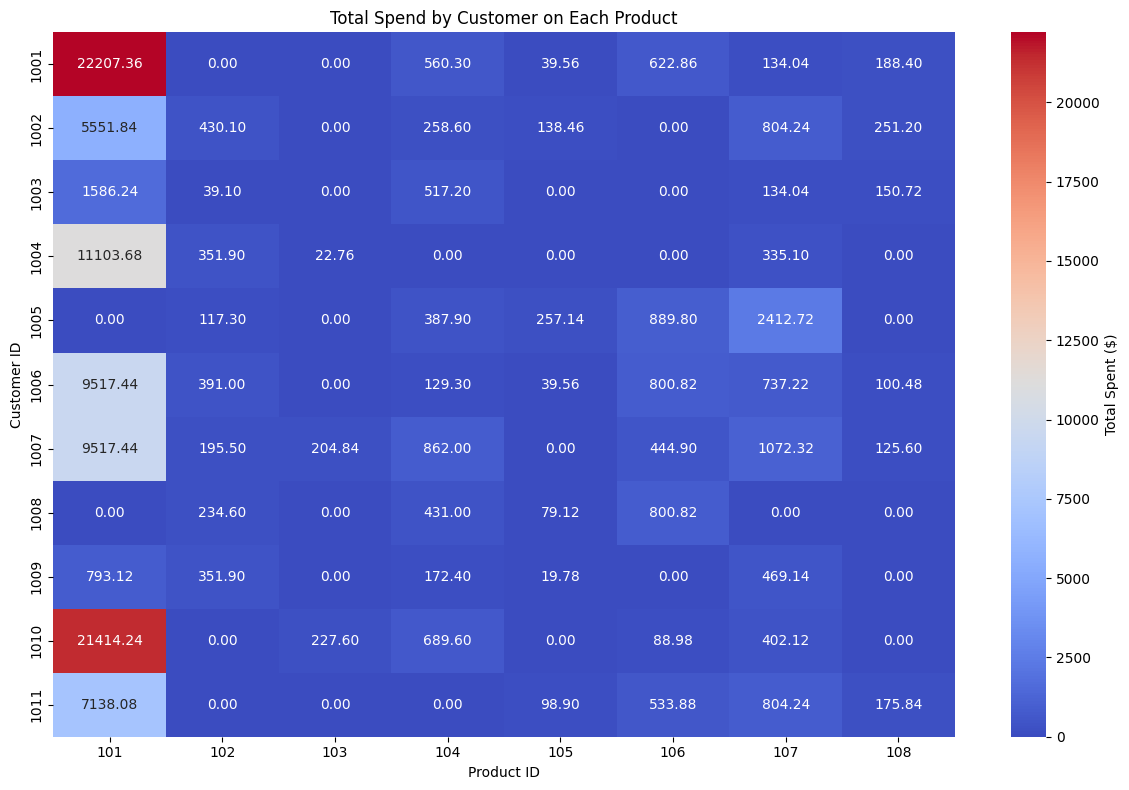

In [187]:
# Pivot the DataFrame to create a table where rows are customer_ids and columns are product_ids
# Values will be the total spent by each customer on each product
heatmap_data = customer_spend_df.pivot_table(index='customer_id', columns='product_id', values='sale_amount', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Total Spent ($)'})
plt.title("Total Spend by Customer on Each Product")
plt.xlabel("Product ID")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


Observations: summarize key statistics to understand the data better.

# Analysis: Drill Down From Monthly Sales to daily sales for our products

Monthly Sales Rollup:
     month  sale_amount
0  2024-01      6431.02
1  2024-02     14591.46
2  2024-03     12150.18
3  2024-04     16945.10
4  2024-05     10982.82
5  2024-06      6444.10
6  2024-07     21038.12
7  2024-08      4627.20
8  2024-09      9492.80
9  2024-10      5853.54
Daily Product Sales Drilldown for 2024-08:
    day product_name  sale_amount
0     1       jacket       536.16
1     1    protector       100.48
2     2    protector       251.20
3     5          hat       129.30
4     5    protector        37.68
5    14       jacket       201.06
6    14       laptop      2379.36
7    21          hat       172.40
8    21       jacket       268.08
9    25          hat       258.60
10   25    protector        75.36
11   28   controller       177.96
12   28     football        39.56


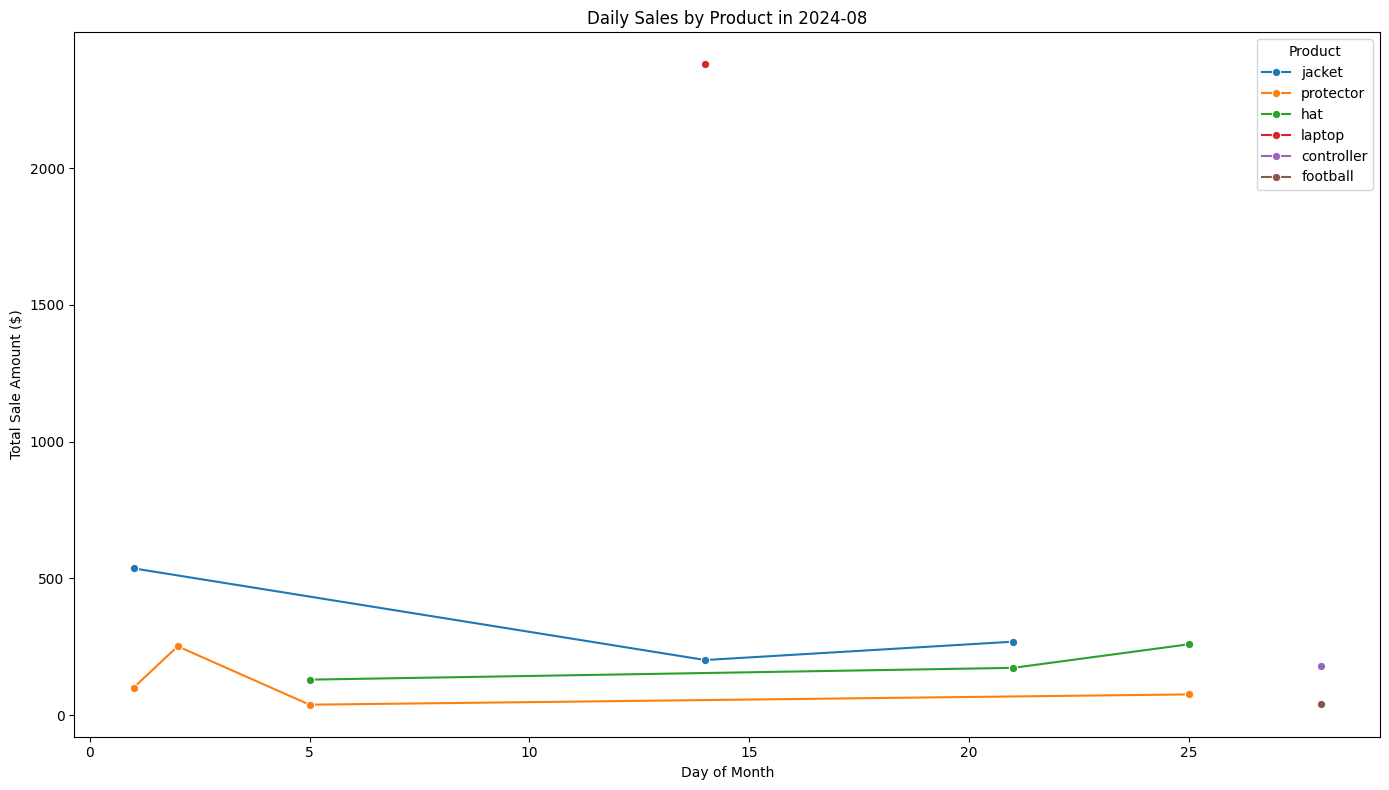

In [188]:
# ROLLUP: Total sales by month
final_df['sale_date'] = pd.to_datetime(final_df['sale_date'])
final_df['month'] = final_df['sale_date'].dt.to_period('M')

monthly_sales = final_df.groupby('month')['sale_amount'].sum().reset_index()
print("Monthly Sales Rollup:")
print(monthly_sales)

# DRILLDOWN: Pick one month and examine daily sales by product
chosen_month = '2024-08'
drill_df = final_df[final_df['month'] == chosen_month].copy()
drill_df['day'] = drill_df['sale_date'].dt.day

# Group by both day and product to see product-level sales per day
daily_product_sales = drill_df.groupby(['day', 'product_name'])['sale_amount'].sum().reset_index()
print(f"Daily Product Sales Drilldown for {chosen_month}:")
print(daily_product_sales)

# Visualization: Lineplot showing daily sales trends by product
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_product_sales, x='day', y='sale_amount', hue='product_name', marker='o')
plt.title(f"Daily Sales by Product in {chosen_month}")
plt.xlabel("Day of Month")
plt.ylabel("Total Sale Amount ($)")
plt.legend(title='Product')
plt.tight_layout()
plt.show()

## Summary: Which Products Drive the Most Revenue?

C:\Users\Alissa\AppData\Local\Temp\ipykernel_9732\763538999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_spent_by_product, x='product_id', y='sale_amount', palette='coolwarm')


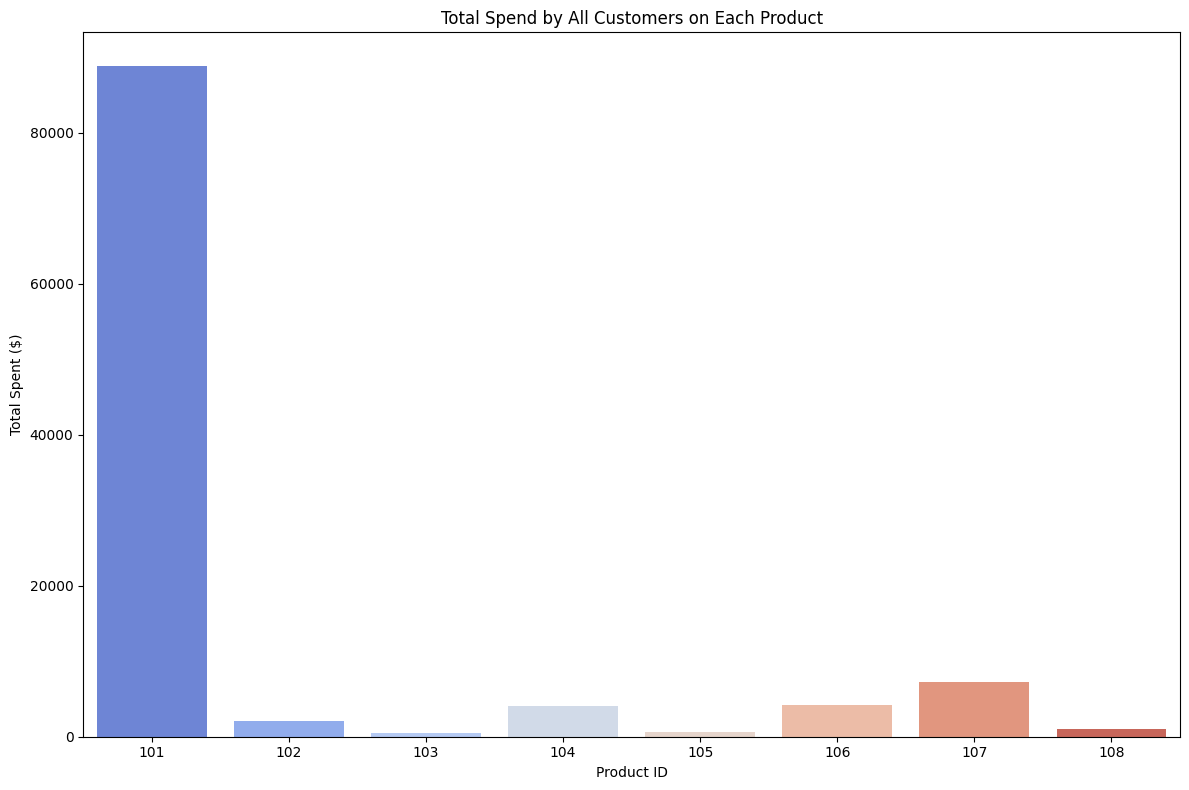

In [189]:
# Group by ProductID and sum the sale_amount to get total spend for each product across all customers
total_spent_by_product = customer_spend_df.groupby(['product_id'])['sale_amount'].sum().reset_index()

# Simple barplot to visualize total spend by all customers on each product
plt.figure(figsize=(12, 8))
sns.barplot(data=total_spent_by_product, x='product_id', y='sale_amount', palette='coolwarm')
plt.title("Total Spend by All Customers on Each Product")
plt.xlabel("Product ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()


# Conclusion
- The 'laptop' product has the highest total spend among customers.
- Certain customers consistently purchase specific products, indicating brand loyalty.

# Insights and Recommendations

- **Top Products**: Customers spend the most on [insert product based on visuals].
- **Customer Preferences**: Some customers repeatedly purchase specific products, suggesting loyalty or strong preference.
- **Marketing Opportunity**: Personalized promotions can be created for customers based on past product spending patterns.
- **Inventory Planning**: Products with high customer spend might be prioritized for restocking or bundling.

- Target high-spending customers with personalized promotions.
- Focus marketing efforts on top-selling products to maximize revenue.
Next steps could include tracking seasonal trends, running customer segmentation, or predicting future purchases using machine learning.
